In [2]:
import sqlite3
import pandas as pd
import duckdb

connection = sqlite3.connect('database/hotel.db')
hotel_df = pd.read_sql_query('select * from hotel', connection)

In [3]:
# rename dataframe columns to lowercase. Pandas is case sensitive
hotel_df.columns = hotel_df.columns.str.lower()
print(hotel_df.columns)
hotel_df.head()

Index(['id', 'url', 'name', 'address', 'latitude', 'longitude', 'altitude',
       'description', 'rating', 'reviews', 'category_rank', 'star_rating',
       'nearby_restaurants', 'nearby_attractions', 'walkers_score', 'pictures',
       'average_night_price', 'price_range_min', 'price_range_max',
       'property_amenities', 'room_features', 'room_types', 'location_rating',
       'cleanliness_rating', 'service_rating', 'value_rating', 'also_known_as',
       'formerly_known_as', 'city_location', 'number_of_rooms',
       'reviews_summary', 'reviews_keypoint_location',
       'reviews_keypoint_atmosphere', 'reviews_keypoint_rooms',
       'reviews_keypoint_value', 'reviews_keypoint_cleanliness',
       'reviews_keypoint_service', 'reviews_keypoint_amenities',
       'reviews_5_excellent', 'reviews_4_very_good', 'reviews_3_average',
       'reviews_2_poor', 'reviews_1_terrible', 'reviews_keywords',
       'scraped_timestamp', 'insert_update_timestamp'],
      dtype='object')


,id,url,name,address,latitude,longitude,altitude,description,rating,reviews,...,reviews_keypoint_service,reviews_keypoint_amenities,reviews_5_excellent,reviews_4_very_good,reviews_3_average,reviews_2_poor,reviews_1_terrible,reviews_keywords,scraped_timestamp,insert_update_timestamp
0,267437109633874,https://www.tripadvisor.com/Hotel_Review-g1877...,Regia Goito,"Via Goito 17, Rome Italy",41.906067,12.500244,0.0,Looking for a place to stay in Rome? Then look...,1.5,20,...,NA,NA,1,0,3,3,13,NA,2024-03-18 10:58:51,2024-03-18 10:58:51
1,423388210168627,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Mazza,"Largo Ettore Marchiafava, 3, Rome Italy",41.907373,12.517269,0.0,NA,4.0,5,...,NA,NA,1,4,0,0,0,NA,2024-03-18 11:41:46,2024-03-18 11:41:46
2,454371077005232,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Casasuri,"Via Enrico Cialdini 13, 00185 Rome Italy",41.898488,12.503187,0.0,B&B Casasuri is an excellent choice for travel...,4.0,2,...,NA,NA,1,0,1,0,0,NA,2024-03-18 15:03:54,2024-03-18 15:03:54
3,492462491596955,https://www.tripadvisor.com/Hotel_Review-g1877...,Villa Faby B&B,"Via Leonida Lay, 195 Trigoria, Rome Italy",41.755265,12.472212,0.0,See why so many travelers make Villa Faby B&B ...,5.0,1,...,NA,NA,1,0,0,0,0,NA,2024-03-18 11:52:08,2024-03-18 11:52:08
4,842369030272705,https://www.tripadvisor.com/Hotel_Review-g1877...,President Gardens,"Via Rasella 148, 00187 Rome Italy",41.902439,12.487371,0.0,NA,4.0,6,...,NA,NA,4,0,0,1,1,NA,2024-03-18 12:51:50,2024-03-18 12:51:50


In [4]:
# query db and return a df with lowercase columns
def get_df(query):
    connection = sqlite3.connect('database/hotel.db')
    df = pd.read_sql_query(query, connection)
    df.columns = df.columns.str.lower()
    connection.close()
    return df

╭──────────┬─────────╮
│   rating │   count │
├──────────┼─────────┤
│      1   │     182 │
│      1.5 │      73 │
│      2   │     190 │
│      2.5 │     315 │
│      3   │     567 │
│      3.5 │     861 │
│      4   │    1461 │
│      4.5 │    1841 │
│      5   │    1268 │
╰──────────┴─────────╯
AxesSubplot(0.125,0.11;0.775x0.77)


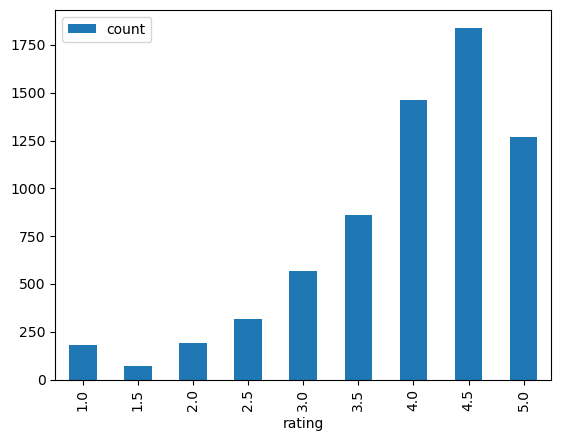

In [5]:
query = 'select rating, count(*) as count from hotel group by rating order by rating'
df = df = get_df(query)

plot = df.to_markdown(tablefmt='rounded_outline', index=False)
table = df.plot.bar(x='rating', y='count')

print(plot)
print(table)

╭───────────────┬─────────╮
│   star_rating │   count │
├───────────────┼─────────┤
│           0   │    3851 │
│           1   │     266 │
│           1.5 │      42 │
│           2   │     540 │
│           2.5 │     133 │
│           3   │    1350 │
│           3.5 │      41 │
│           4   │     449 │
│           4.5 │       5 │
│           5   │      81 │
╰───────────────┴─────────╯
AxesSubplot(0.125,0.11;0.775x0.77)


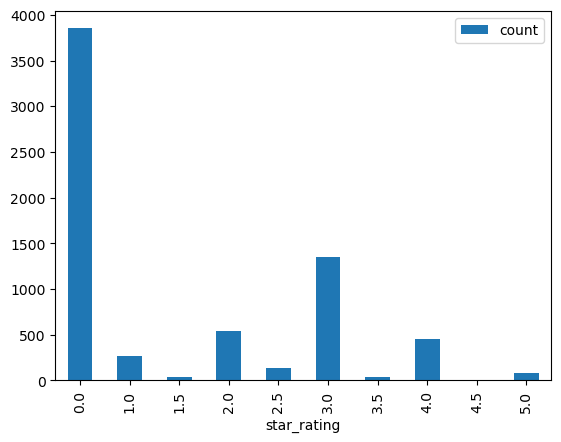

In [6]:
query = 'select star_rating, count(*) as count from hotel group by star_rating order by star_rating'
df = df = get_df(query)

plot = df.to_markdown(tablefmt='rounded_outline', index=False)
table = df.plot.bar(x='star_rating', y='count')

print(plot)
print(table)

╭───────────────────┬─────────╮
│   location_rating │   count │
├───────────────────┼─────────┤
│               1   │      68 │
│               1.3 │       3 │
│               1.5 │       1 │
│               1.6 │       1 │
│               1.7 │       4 │
│               1.8 │       4 │
│               1.9 │       1 │
│               2   │      44 │
│               2.1 │       2 │
│               2.2 │       9 │
│               2.3 │      12 │
│               2.4 │       7 │
│               2.5 │      31 │
│               2.6 │      10 │
│               2.7 │      22 │
│               2.8 │      21 │
│               2.9 │      18 │
│               3   │     173 │
│               3.1 │      32 │
│               3.2 │      40 │
│               3.3 │      74 │
│               3.4 │      62 │
│               3.5 │     102 │
│               3.6 │      70 │
│               3.7 │     115 │
│               3.8 │     127 │
│               3.9 │     122 │
│               4   │     503 │
│       

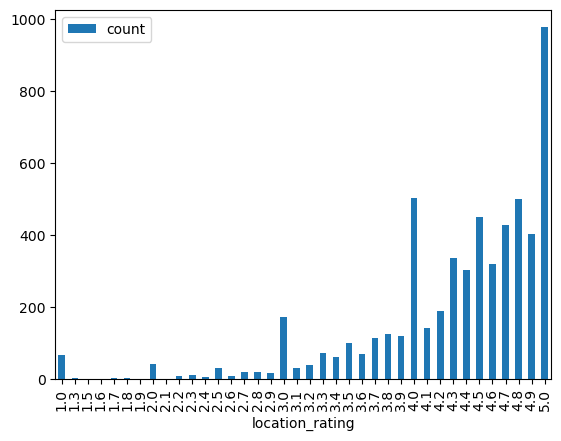

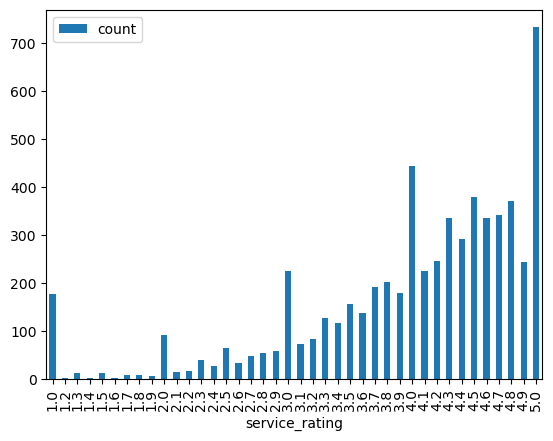

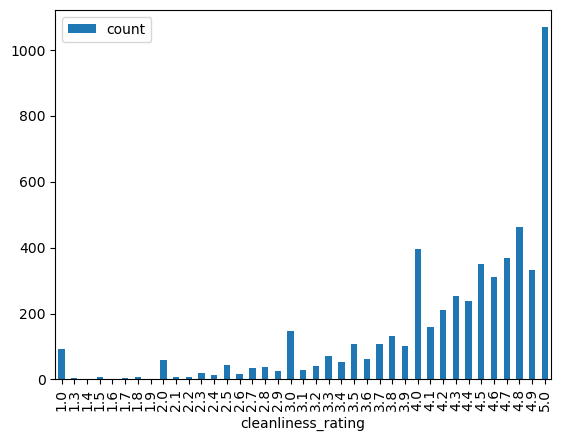

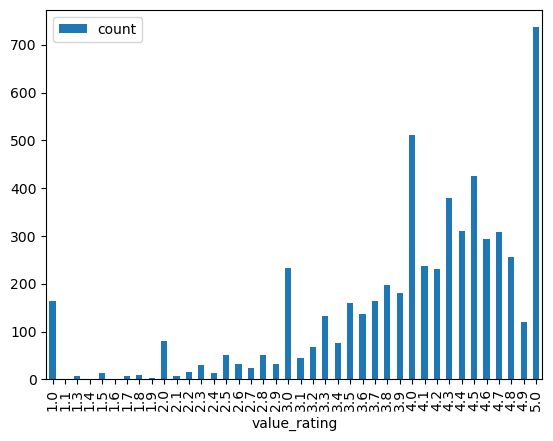

In [7]:
query = 'select location_rating, count(*) as count from hotel where location_rating != -1 group by location_rating order by location_rating'
df = get_df(query)

plot = df.to_markdown(tablefmt='rounded_outline', index=False)
table = df.plot.bar(x='location_rating', y='count')

print(plot)
print(table)


query = 'select service_rating, count(*) as count from hotel where service_rating != -1 group by service_rating order by service_rating'
df = get_df(query)

plot = df.to_markdown(tablefmt='rounded_outline', index=False)
table = df.plot.bar(x='service_rating', y='count')

print(plot)
print(table)


query = 'select cleanliness_rating, count(*) as count from hotel where cleanliness_rating != -1 group by cleanliness_rating order by cleanliness_rating'
df = get_df(query)

plot = df.to_markdown(tablefmt='rounded_outline', index=False)
table = df.plot.bar(x='cleanliness_rating', y='count')

print(plot)
print(table)


query = 'select value_rating, count(*) as count from hotel where value_rating != -1 group by value_rating order by value_rating'
df = get_df(query)

plot = df.to_markdown(tablefmt='rounded_outline', index=False)
table = df.plot.bar(x='value_rating', y='count')

print(plot)
print(table)


In [8]:
# plot points on a map
query = 'select latitude, longitude from hotel'
df = get_df(query)
df.head()

import folium
from folium.plugins import HeatMap

m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m


In [9]:
import folium
from folium.plugins import HeatMap

query = """select mp.LATITUDE, mp.LONGITUDE, h.RATING from HOTEL h left join hotel_mapquest_location mp on h.ID = mp.HOTEL_ID where mp.RANK = 0 and ADMIN_AREA_4 = 'Rome' and mp.LATITUDE is not null"""
df = get_df(query)
df.head()

# Create a folium map centered at the mean latitude and longitude of the data points with an initial zoom level of 2
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12.5)

# Construct the heatmap data with latitude, longitude, and rating
heat_data = [[row['latitude'], row['longitude'], row['rating']] for index, row in df.iterrows()]

# Add the heatmap layer to the folium map, using the 'rating' column as weights
HeatMap(heat_data, min_opacity=0.2, max_val=max(df['rating'])).add_to(m)

# Display the folium map
m

/var/folders/0g/w_2j2dtn49l6qtdk1r46zqtc0000gn/T/ipykernel_81078/2339915036.py:15: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.2, max_val=max(df['rating'])).add_to(m)


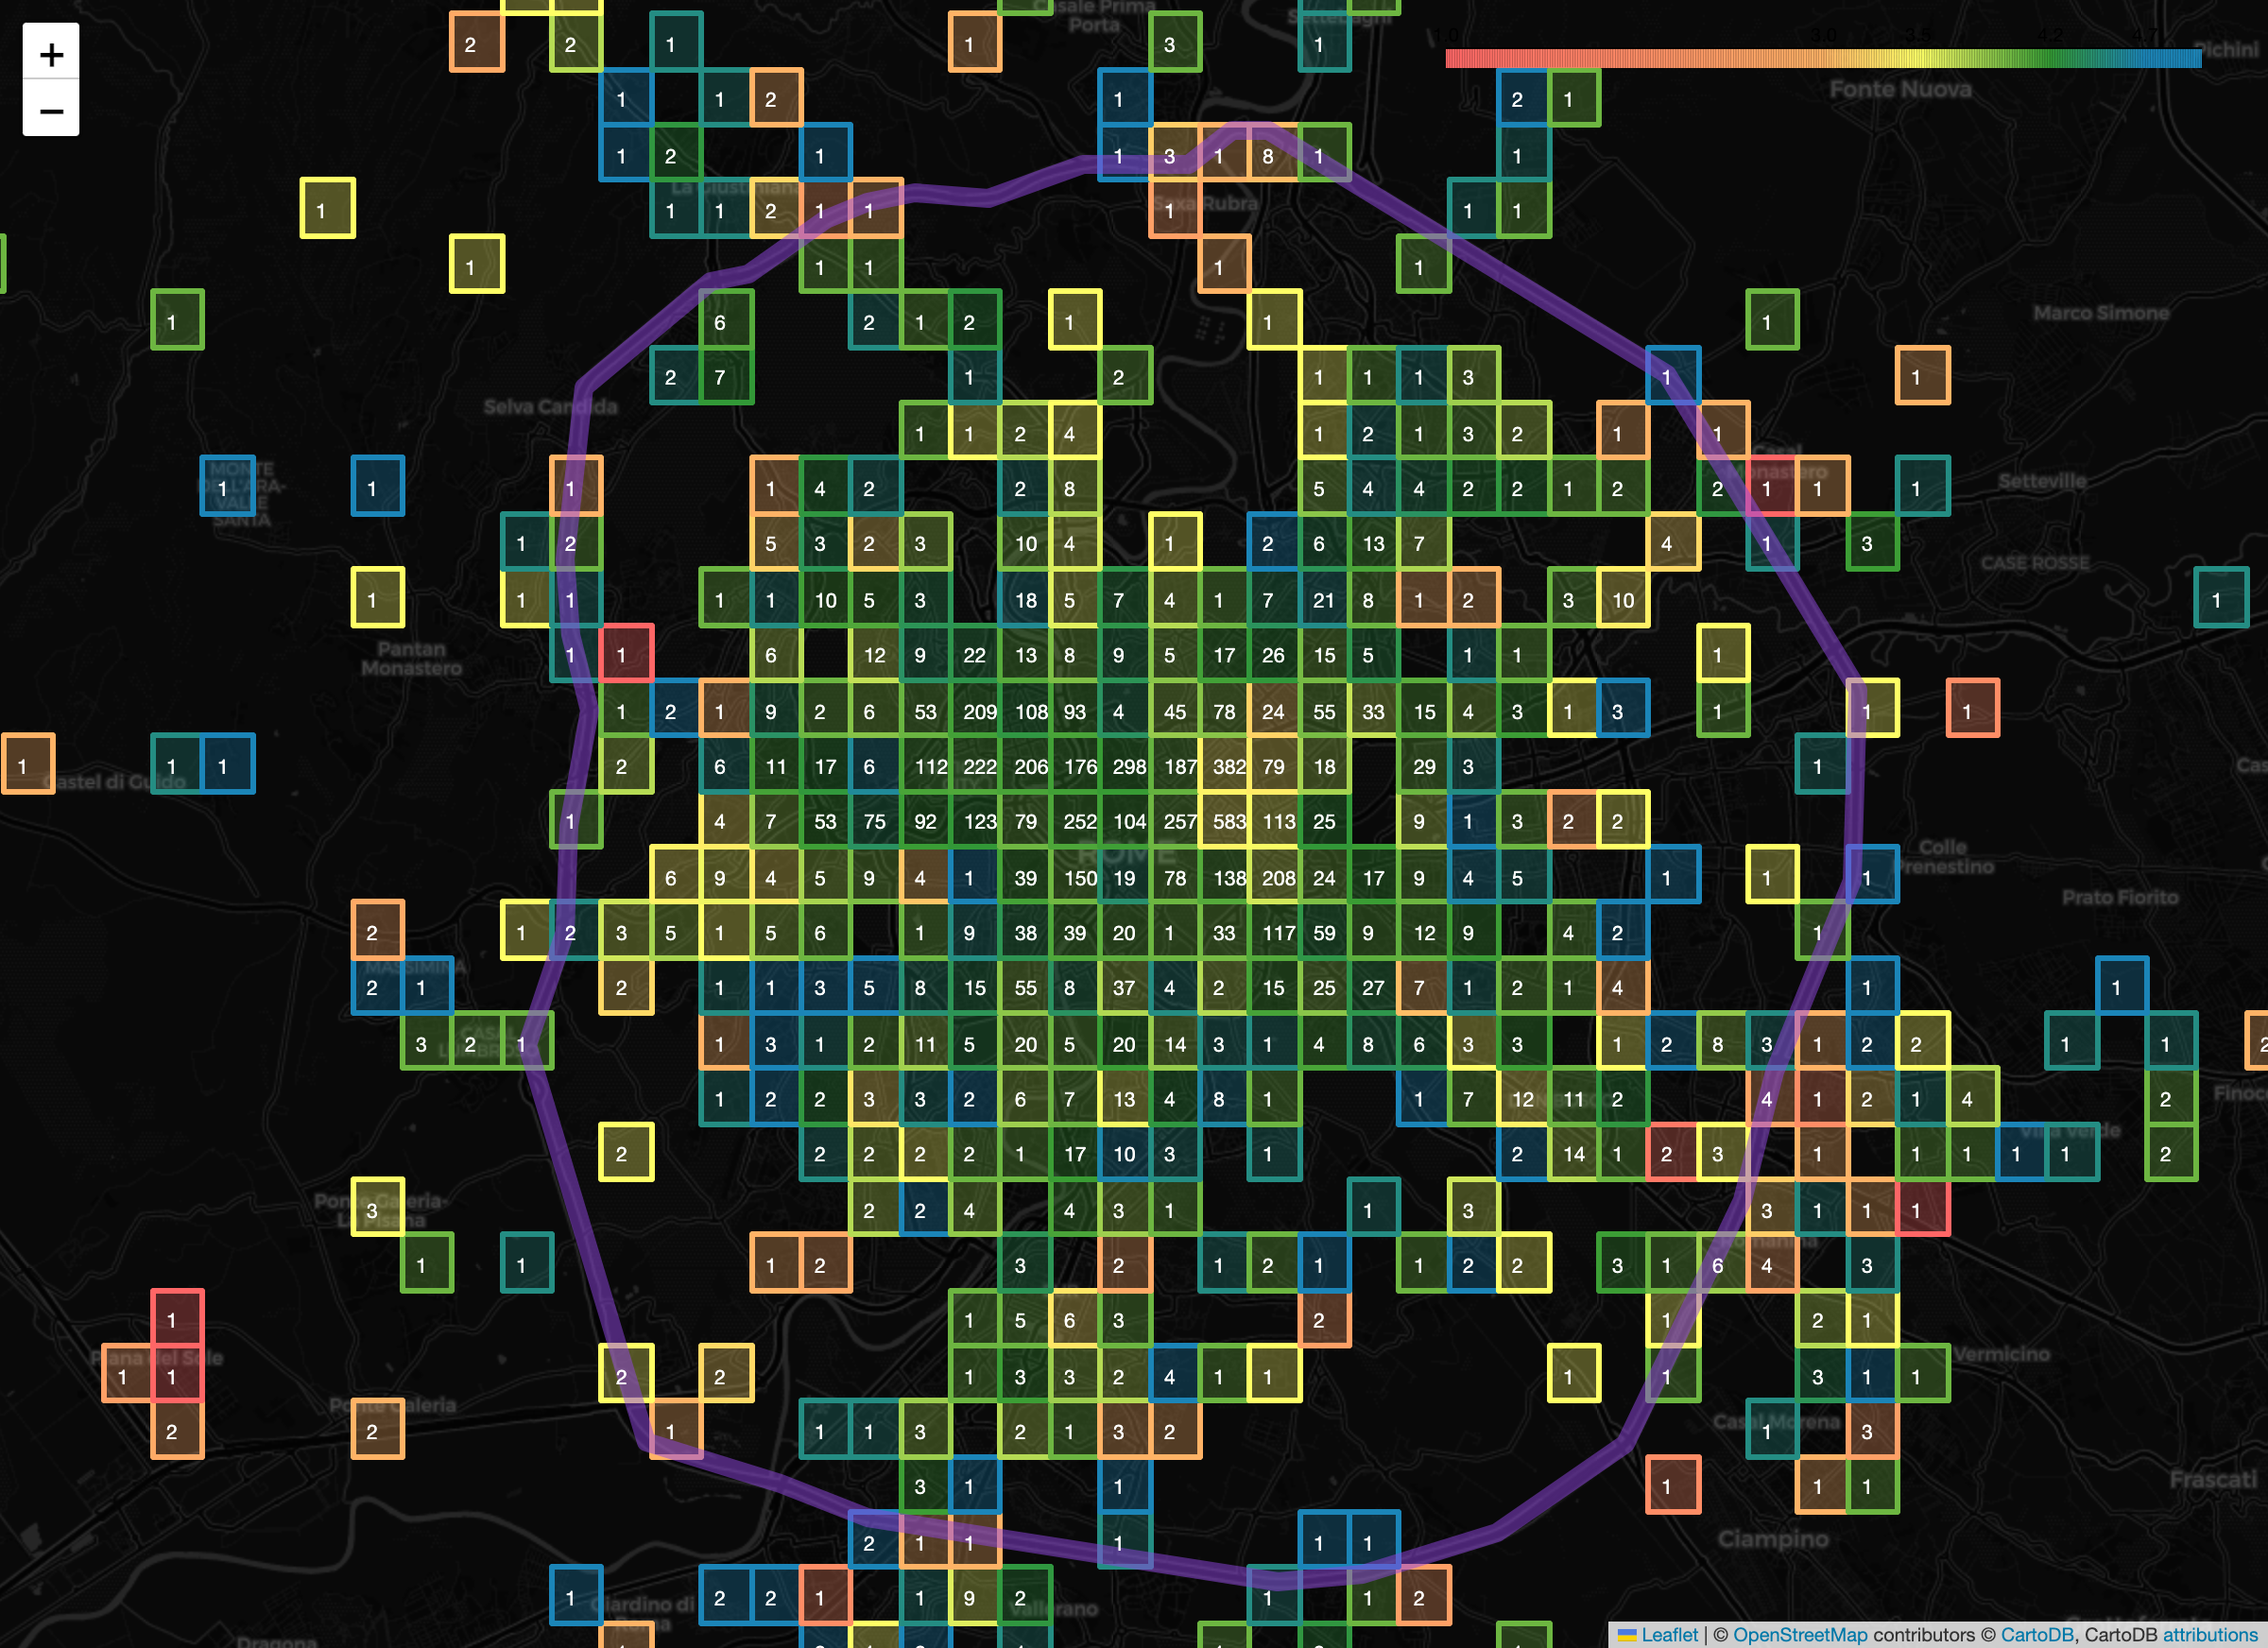

In [44]:
import folium
import numpy as np

query = """
select 
    mp.latitude, 
    mp.longitude, 
    h.rating 
from 
    hotel h 
    left join hotel_mapquest_location mp on h.id = mp.hotel_id 
where 
    mp.rank = 0 -- Keep only the main location of the hotel
    and admin_area_4 = 'Rome' -- Remove few wrong geocoded hotels
    and mp.latitude is not null -- Remove non geocoded hotels (non reviewed hotels)
    and admin_area_5 = 'Rome' -- Restrict to hotels in Rome
"""
df = get_df(query)
df.head()

# Define the number of rows and columns for the grid
num_rows = 50
num_cols = 50

# Calculate the size of each grid cell
lat_range = df['latitude'].max() - df['latitude'].min()
lon_range = df['longitude'].max() - df['longitude'].min()
lat_step = lat_range / num_rows
lon_step = lon_range / num_cols

# Create a folium map centered at the mean latitude and longitude of the data points with an initial zoom level of 2
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12, tiles="Cartodb dark_matter")

# Define a colormap for the ratings with more colors using a diverging colormap
bright_pastel_colors = ['#FF6666', '#FFB366', '#FFFF66', '#339933', '#1b85b8']
colormap = folium.LinearColormap(colors=bright_pastel_colors,
                               vmin=1, vmax=5,
                               index=[1, 3, 3.5, 4.2, 4.7])

# Iterate over each grid cell
for i in range(num_rows):
    for j in range(num_cols):
        # Calculate the boundaries of the current grid cell
        lat_min = df['latitude'].min() + i * lat_step
        lat_max = df['latitude'].min() + (i + 1) * lat_step
        lon_min = df['longitude'].min() + j * lon_step
        lon_max = df['longitude'].min() + (j + 1) * lon_step
        
        # Filter hotels within the current grid cell
        hotels_in_cell = df[(df['latitude'] >= lat_min) & (df['latitude'] < lat_max) &
                            (df['longitude'] >= lon_min) & (df['longitude'] < lon_max)]
        
        # Calculate the average rating for the current grid cell
        avg_rating = hotels_in_cell['rating'].mean()

        # Color the grid cell based on the average rating
        if len(hotels_in_cell) == 0:
            color = 'rgba(0, 0, 0, 0)'  # Transparent color for empty cells
        else:
            color = colormap(avg_rating)
                
        # Create a rectangle representing the grid cell and add it to the map
        folium.Rectangle(bounds=[[lat_min, lon_min], [lat_max, lon_max]], color=color, fill=True, fill_opacity=0.3).add_to(m)

        # Add text label about the number of hotels
        if len(hotels_in_cell) > 0:
            folium.map.Marker([(lat_min + lat_max) / 2, (lon_min + lon_max) / 2],
                               icon=folium.DivIcon(html=f'<div style="font-size: 8pt; color: white; font=Roboto">{len(hotels_in_cell)}</div>')).add_to(m)

# Add the colormap to the map
caption = 'Rating'
colormap.add_to(m)

gra_coordinates = [
    (41.95599312856956, 12.38429590176482), # top left (Ottavia)
    (41.97024610942314, 12.40746422272264),
    (41.971300436721165, 12.414328047668834),
    (41.978591325554895, 12.428287220114637),
    (41.980874264564086, 12.435909047874086),
    (41.98221250308595, 12.44456142839791), # via veientana
    (41.98153161821228, 12.457721660413913), # via di quarto annunziata
    (41.98607444445743, 12.47493946122003), # via veientana nuova
    (41.9860864505197, 12.494350776611357), # via flaminia 
    (41.99074229228052, 12.50224196917452),
    (41.99074614137014, 12.508650705708398),
    (41.957643421734375, 12.580933443817395), # via nomentana
    (41.915104656365614, 12.615568334900995),
    (41.88921668477889, 12.614684040154145), # via tor bella monaca
    (41.863537740551074, 12.600535318396178),
    (41.845941968684286, 12.594647129960238),
    (41.81310099509219, 12.573451232793662), # via appia nuova
    (41.800896239533174, 12.550124531069153), 
    (41.795378258246174, 12.52584457469644), 
    (41.79424952171819, 12.510256057765057), # via della cecchignola
    (41.8031534585853, 12.435790048772901), # via cristoforo colombo
    (41.80754226799676, 12.419977236517546), # via ostiense
    (41.81330996023854, 12.395697280393534),
    (41.866949679156555, 12.373996718926886),
    (41.882440009925894, 12.380837722857946), # via aurelia
    (41.896549226237006, 12.38156668227417),
    (41.91231072964025, 12.385434864274632), # via di boccea
    (41.922348339863476, 12.381834645926402),
    (41.932587787973276, 12.38074090872054),
    (41.95599312856956, 12.38429590176482),

]
folium.PolyLine(locations=gra_coordinates, color='#9245e3', tooltip='Grande Raccordo Anulare (A90)', opacity=0.5, weight=10).add_to(m)

# Display the folium map
m




# save map as screenshot to render in notebook
from selenium import webdriver
import os
import time

# Save the map as an HTML file
map_html = 'maps/map.html'
m.save(map_html)

driver = webdriver.Chrome()
# Open the HTML file in the WebDriver
driver.get('file:///' + os.path.abspath(map_html))
time.sleep(3)
# Take a screenshot of the map
screenshot_path = 'maps/map_screenshot.png'
driver.save_screenshot(screenshot_path)
driver.quit()

# Display the screenshot in the notebook
from IPython.display import Image
Image(filename=screenshot_path)
